In [ ]:
import pandas as pd
import seaborn as sns

In [49]:
coasters = pd.read_excel("Roller Coaster Data.xlsx", sheet_name=0)
locations = pd.read_excel("Roller Coaster Data.xlsx", sheet_name=1)

In [ ]:
coasters.head()

In [18]:
locations.head()

,Coaster_Park,Park_Country,Park_Region,Park_City,Admission_Price,Admission_Num,Avg_Temp,Avg_Rainfall,Rain_Days,Age_1_25,...,Age_3_25,Age_4_25,Age_1_50,Age_2_50,Age_3_50,Age_4_50,Male_25,Female_25,Male_50,Female_50
0,Funville,United States,Texas,Arlington,45.000,923943,77.54,38.36,48.55,130810,...,75315,23784,144446,194254,104599,54790,195638,200756,242875,255214
1,Swamp Valley Thrill Zone,United States,Louisiana,Baton Rouge,30.000,525327,75.13,49.58,178.11,56345,...,28172,30426,187627,167343,91278,60852,115448,109930,265562,241538
2,Beschleunigungszone,Germany,Hesse,Frankfurt,23.168,1707802,52.69,24.77,72.61,139211,...,230797,117230,170873,290484,256310,136699,378166,354522,427061,427305
3,Sharkie Shoals,United States,Florida,Clearwater,40.000,1291517,72.64,52.60,187.97,24741,...,21497,30309,159981,249624,119411,111305,59703,55809,325581,314740
4,Horsepower Bay,United States,Michigan,Ann Arbor,30.000,795173,49.78,37.55,160.19,26342,...,50253,17326,284985,276150,189599,116426,60343,61134,450650,416510


In [ ]:
# join coaster data
all_data = pd.merge(coasters, locations, on="Coaster_Park")

In [ ]:
# make sure shape of all data is as expected 
print(coasters.shape)
print(locations.shape)
print(all_data.shape)

Text(0, 0.5, 'Revenue (Hundreds of Millions)')

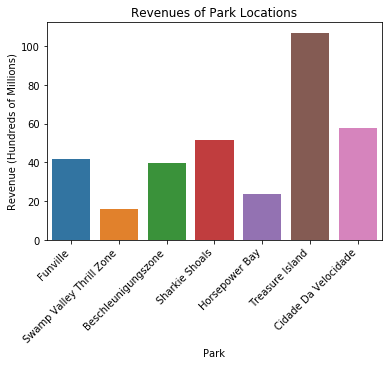

In [50]:
# explore location data 

locations = locations.set_index("Coaster_Park")
locations_revenue = locations["Admission_Num"] * locations["Admission_Price"] / 1000000
rev_plot = sns.barplot(x=locations_revenue.index, y=locations_revenue)
rev_plot.set_xticklabels(rev_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
rev_plot.set_title("Revenues of Park Locations")
rev_plot.set_xlabel("Park")
rev_plot.set_ylabel("Revenue (Hundreds of Millions)")


In [51]:
# How can we create a metric for revenue generated by each coaster? 

min(coasters["Wait_Time"])

15.883